In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df['age'] =  df['age'] / 365

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardiovascular disease'}, inplace=True)

In [8]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
df_train = df.drop('id', axis=1)

In [10]:
df_train.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     70000 non-null  float64
 1   gender                  70000 non-null  int64  
 2   height                  70000 non-null  int64  
 3   weight                  70000 non-null  float64
 4   systolic                70000 non-null  int64  
 5   diastolic               70000 non-null  int64  
 6   cholesterol             70000 non-null  int64  
 7   glucose                 70000 non-null  int64  
 8   smoke                   70000 non-null  int64  
 9   alcohol                 70000 non-null  int64  
 10  active                  70000 non-null  int64  
 11  cardiovascular disease  70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [12]:
df_train.duplicated().sum()

24

In [13]:
df_train[df_train.duplicated()]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
10562,56.150685,1,165,70.0,120,80,1,1,0,0,1,0
21784,46.008219,1,165,68.0,120,80,1,1,0,0,1,0
38505,52.021918,1,164,65.0,120,80,1,1,0,0,1,0
40365,39.868493,1,158,64.0,120,80,1,1,0,0,1,0
42450,50.282192,1,169,67.0,120,80,1,1,0,0,1,0
44653,46.402740,2,170,70.0,120,80,1,1,0,0,0,0
45125,58.301370,1,165,65.0,120,80,1,1,0,0,1,0
45748,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
45810,58.164384,1,164,62.0,120,80,1,1,0,0,1,0
48917,60.123288,1,165,60.0,120,80,1,1,0,0,1,0


In [14]:
df_train.drop_duplicates(inplace=True)

In [15]:
df_train.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
df_train.count()

age                       69976
gender                    69976
height                    69976
weight                    69976
systolic                  69976
diastolic                 69976
cholesterol               69976
glucose                   69976
smoke                     69976
alcohol                   69976
active                    69976
cardiovascular disease    69976
dtype: int64

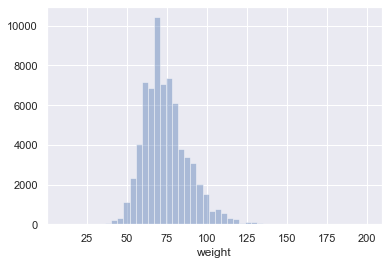

In [17]:
sns.distplot(df_train['weight'], kde=False)
plt.show()

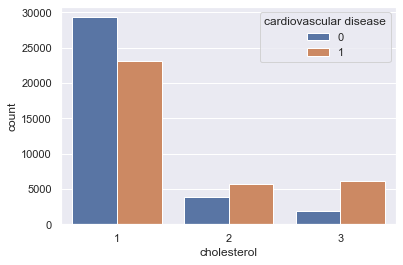

In [18]:
sns.countplot(x='cholesterol', hue='cardiovascular disease', data=df_train)
plt.show()

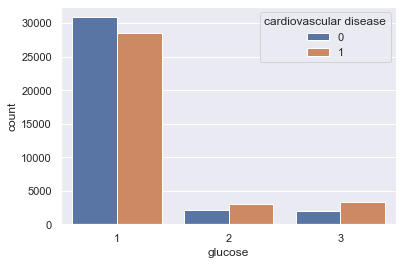

In [19]:
sns.countplot(x='glucose', hue='cardiovascular disease', data=df_train)
plt.show()


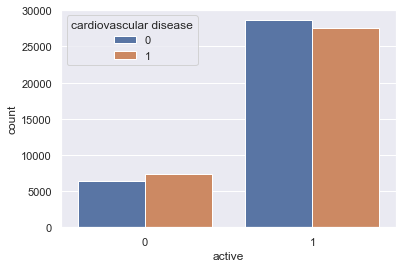

In [20]:
sns.countplot(x='active', hue='cardiovascular disease', data=df_train)
plt.show()


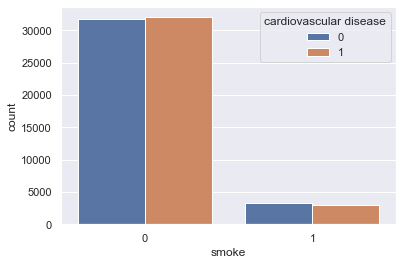

In [21]:
sns.countplot(x='smoke', hue='cardiovascular disease', data=df_train)
plt.show()


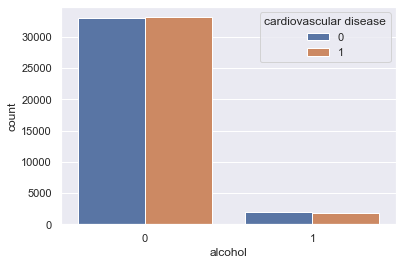

In [22]:
sns.countplot(x='alcohol', hue='cardiovascular disease', data=df_train)
plt.show()
